In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
iris_df = pd.read_csv('Iris.csv')

### EXPLORING THE DATASET

In [3]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
knn_palette = sns.color_palette(['#000C1F', '#29757A', '#FF5050'])
knn_palette

[(0.0, 0.047058823529411764, 0.12156862745098039),
 (0.1607843137254902, 0.4588235294117647, 0.47843137254901963),
 (1.0, 0.3137254901960784, 0.3137254901960784)]

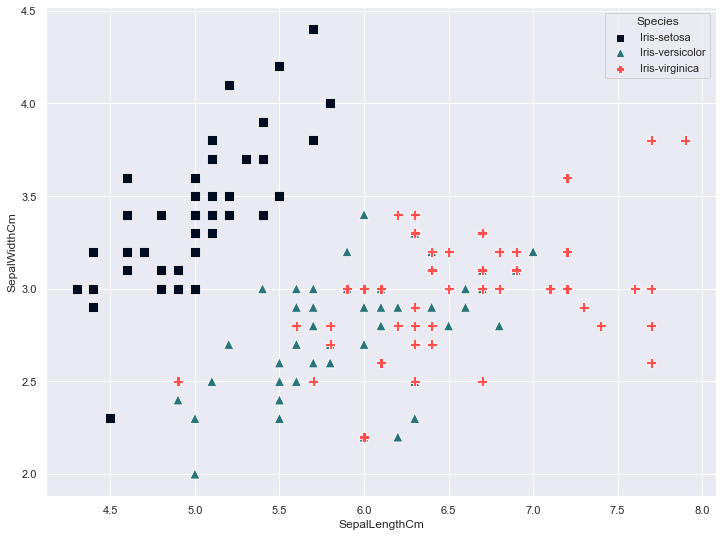

In [40]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='SepalLengthCm', y= 'SepalWidthCm',
                data = iris_df,
                hue = 'Species',
                palette= knn_palette,
                markers = [',', '^', 'P'],
                style = 'Species',
                s = 100);

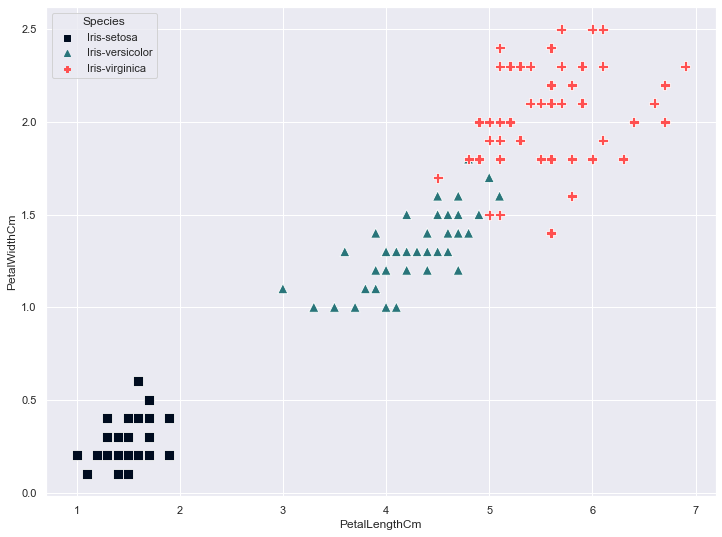

In [41]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='PetalLengthCm', y= 'PetalWidthCm',
                data = iris_df,
                hue = 'Species',
                palette= knn_palette,
                markers = [',', '^', 'P'],
                style = 'Species',
                s = 100);

## Visualizing the distribution of the points

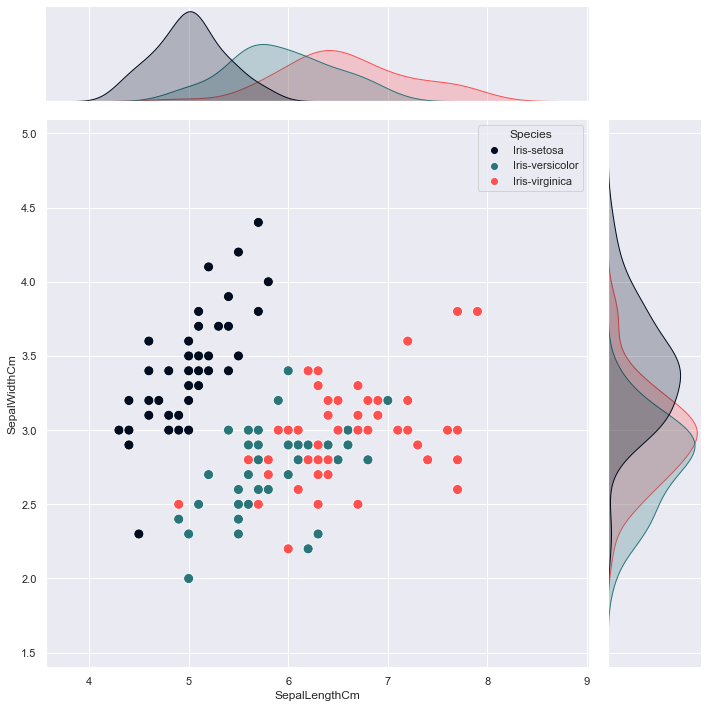

In [45]:
sns.jointplot(x='SepalLengthCm', y= 'SepalWidthCm',
                data = iris_df,
                hue = 'Species',
                palette= knn_palette,
                height = 10,
                s = 100);

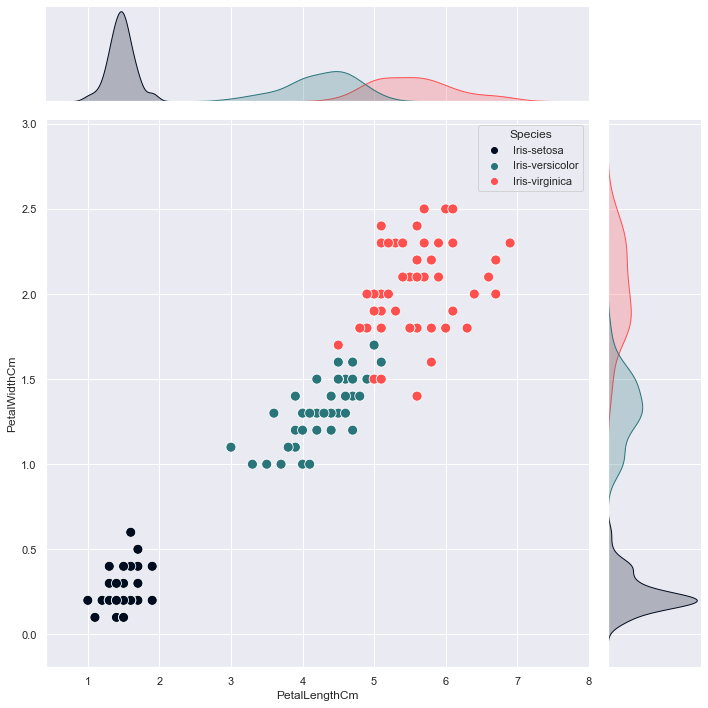

In [17]:
sns.jointplot(x='PetalLengthCm', y= 'PetalWidthCm',
                data = iris_df,
                hue = 'Species',
                palette= knn_palette,
                height = 10,
                s = 100);

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

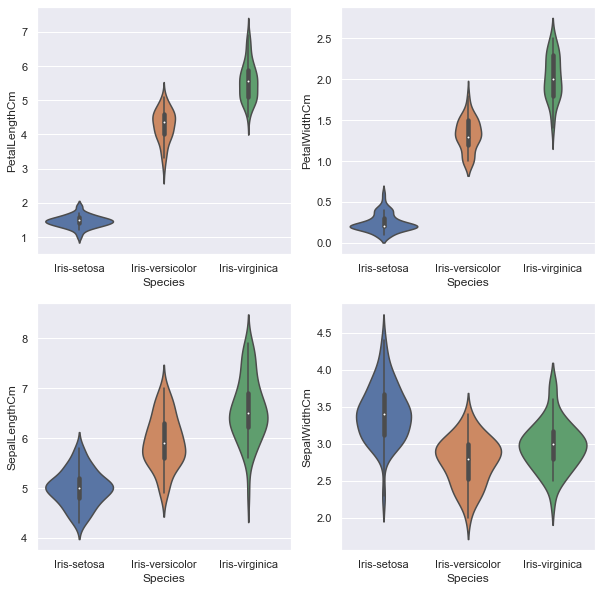

In [19]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris_df)

plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris_df)

plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris_df)

plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris_df)

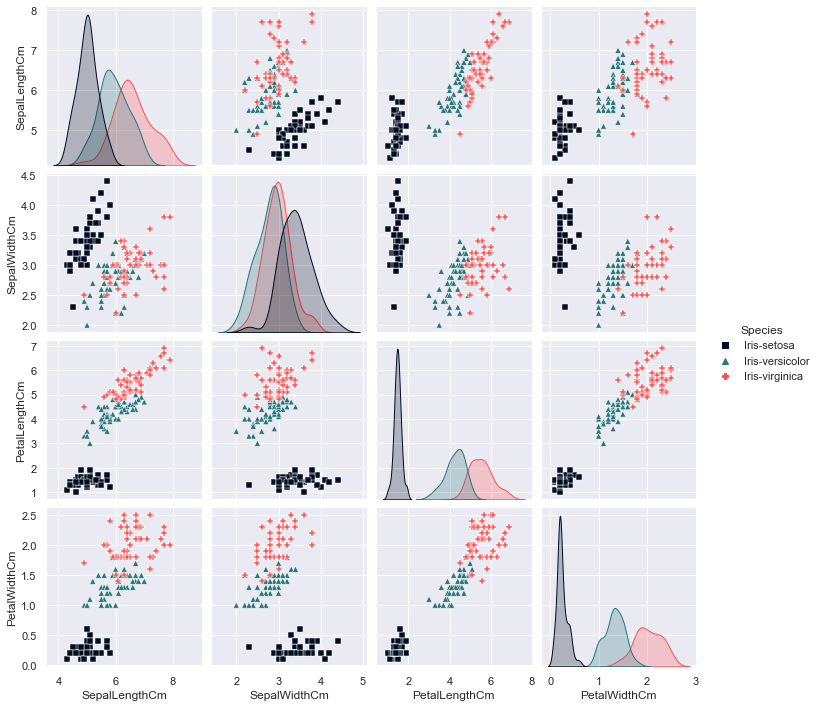

In [36]:
# Let's try the Seaborn pairplot
sns.pairplot(iris_df, hue = 'Species', palette= knn_palette,markers = [',', '^', 'P'])

C:\Users\OLUWAS~1\AppData\Local\Temp/ipykernel_9480/3246119299.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris_df.corr(),annot=True, cmap='RdBu')


<AxesSubplot:>

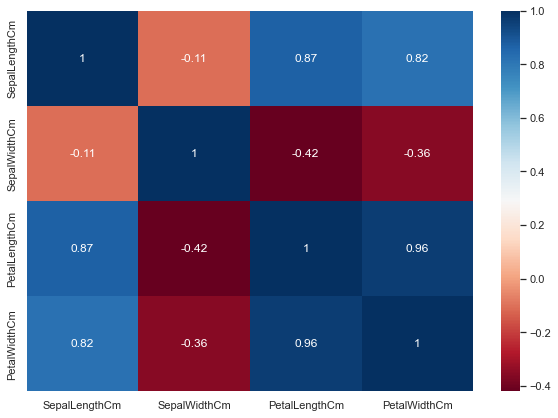

In [22]:
# Let's check the correlation between the variables 
plt.figure(figsize=(10,7))
sns.heatmap(iris_df.corr(),annot=True, cmap='RdBu')

### DATA CLEANING

In [23]:
# Let's drop the ID and Species (target label) coloumns
X = iris_df.drop(['Species'],axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
y = iris_df['Species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [25]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [26]:
X_train.shape

(97, 4)

In [27]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
76,6.8,2.8,4.8,1.4
129,7.2,3.0,5.8,1.6
119,6.0,2.2,5.0,1.5
114,5.8,2.8,5.1,2.4
14,5.8,4.0,1.2,0.2


In [28]:
y_train

76     Iris-versicolor
129     Iris-virginica
119     Iris-virginica
114     Iris-virginica
14         Iris-setosa
            ...       
84     Iris-versicolor
27         Iris-setosa
123     Iris-virginica
53     Iris-versicolor
46         Iris-setosa
Name: Species, Length: 97, dtype: object

### TRAINING THE MODEL

In [29]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

### EVALUATING MODEL

<AxesSubplot:>

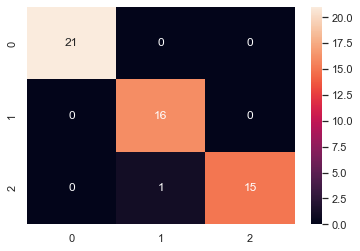

In [32]:
y_predict = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d')

In [33]:
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        53
      macro avg       0.98      0.98      0.98        53
   weighted avg       0.98      0.98      0.98        53

